In [15]:
# We'll be testing the trainer class here and fixing stuff wherever necessary

# added library folder to path for notebook
import sys  
sys.path.insert(0, './gray_lib')

In [16]:
# imported all contents
from gray_lib import *

In [3]:
# import other modules
from mnist import MNIST
import random
import matplotlib.pyplot as plt

In [4]:
# Load data
mndata = MNIST('samples')
mndata.gz = True

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [5]:
# Define a trainer instance
trainer = Trainer(x_train=train_images,y_train=train_labels,x_test=test_images,y_test=test_labels)

In [6]:
# create a model
trainer.create_model()

In [7]:
# compile model
trainer.compile_model()

('compiling model', <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002317AE70048>)
('model compiled successfully',)


In [8]:
# train the model
trainer.train(epochs=10)

Train on 124800 samples
Epoch 1/10
124800/124800 - 11s - loss: 0.7613 - accuracy: 0.7689
Epoch 2/10
124800/124800 - 10s - loss: 0.4182 - accuracy: 0.8673
Epoch 3/10
124800/124800 - 10s - loss: 0.3421 - accuracy: 0.8893
Epoch 4/10
124800/124800 - 10s - loss: 0.3004 - accuracy: 0.9015
Epoch 5/10
124800/124800 - 11s - loss: 0.2714 - accuracy: 0.9079
Epoch 6/10
124800/124800 - 10s - loss: 0.2482 - accuracy: 0.9159
Epoch 7/10
124800/124800 - 11s - loss: 0.2301 - accuracy: 0.9213
Epoch 8/10
124800/124800 - 10s - loss: 0.2141 - accuracy: 0.9247
Epoch 9/10
124800/124800 - 12s - loss: 0.2009 - accuracy: 0.9289
Epoch 10/10
124800/124800 - 11s - loss: 0.1900 - accuracy: 0.9321


In [9]:
# evaluate model's performance on passed testing data
trainer.evaluate()

(0.34962798782275056, 0.90028846)

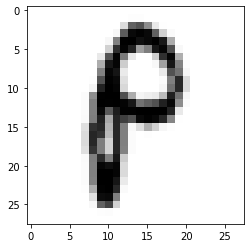

15 p


In [10]:
# select a random image to test prediction
label,character,index = showRandomImageFrom(images=trainer.test_images,labels=trainer.test_labels)

In [13]:
# check prediction for above selected image
char,pred = trainer.predict_one(inp=test_images[index],get_char=False)

In [14]:
trainer.get_char_from_pred(pred)

'p'